In [1]:
import pdb
import numpy as np
import glob
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from labellines import labelLine, labelLines
import seaborn as sns
import math
from statannot import add_stat_annotation
import pickle
from lib_alban.libplot_metrics import *

In [2]:
def analysis(list_labels_ref, conditions, experiment='TwoCubesBlender128_AlbanNetsup1024', cube=False):
    gvalue = np.arange(0.2,0.81,(0.8-0.2)/(len(conditions)-1))
    colors_ref = [tuple([i, i, i]) for i in gvalue]
    
    instance = experiment.split('_')[0]
    dataset = experiment.split('_')[1]
    
    ### DATA FOR VR

    with open(f'results_analysis/{instance}/illutest_{dataset}_{instance}_ALL.pkl', 'rb') as pickle_file:
        illumtest = pickle.load(pickle_file)
    with open(f'results_analysis/{instance}/illuref_{dataset}_{instance}_ALL.pkl', 'rb') as pickle_file:
        illumref = pickle.load(pickle_file)
    with open(f'results_analysis/{instance}/matches_{dataset}_{instance}_ALL.pkl', 'rb') as pickle_file:
        MATCHES = pickle.load(pickle_file)


    rlum = {}
    thouless = {}
    STATS = {}
    for condition in conditions:
        
        #import pdb; pdb.set_trace()
        rref = np.zeros(illumref['normal'].shape)
        for c, i in enumerate(list_labels_ref):
            rref[:,c] = i
        illumtest[condition] = np.transpose(illumtest[condition], (0,1,3,2))
        illumtest[condition] = illumtest[condition][:,:,:,0]
        illumtest[condition] = illumtest[condition][:,:,:,np.newaxis]

        illumref[condition] = np.transpose(illumref[condition], (0,1,3,2))
        illumref[condition] = illumref[condition][:,:,:,0]
        illumref[condition] = illumref[condition].reshape(illumtest[condition].shape)

        MATCHES[condition] = np.transpose(MATCHES[condition], (0,1,3,2))

        rlum[condition] = rref *illumref[condition]/illumtest[condition]
        thouless[condition] = (np.log(MATCHES[condition]) - np.log(rlum[condition]))/(np.log(rref) - np.log(rlum[condition]))

        STATS[condition] = plot_n_analyse_stats(illumref[condition], illumtest[condition], MATCHES[condition], list_labels_ref, rref,  colors_ref, xpname = '%s_%s'%(experiment, condition))
        
    return illumref, illumtest, MATCHES, STATS


In [3]:
def plot_thouless_allinst(illumref, illumtest, MATCHES, list_labels_ref, rref, condition = 'normal',xpname='', lr=0):# p for participant, default 0 if there's only one model;
    fig, sub = plt.subplots(1, 1, figsize=(4, 4))
    X = np.log(illumtest[0, :, :, lr].mean(0)) - np.log(illumref[0, :, :, lr].mean(0)) # x axis
    x0 = X[0] - X[0] / 10
    x1 = X[-1] + X[-1] / 10
    Y = np.log(MATCHES[:,:,:,lr])

    reg = LinearRegression(fit_intercept=True)
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']  # defualt colors used by matplotlib
    for r in range(len(list_labels_ref)):
        for p in range(len(Y)):
            y = Y[p, r]
            for trial in range(len(MATCHES[p, r, 0])):
                sub.scatter(X, np.log(MATCHES[p, r, :, trial]), s=5, color=colors[r])

        meany = Y[:,r].mean(0)
            
        reg.fit(X[:, np.newaxis], meany)
        sub.plot([x0, x1], [reg.intercept_ + reg.coef_ * x0, reg.intercept_
                                                  + reg.coef_ * x1],
                                       label=str(1.00 + np.round(reg.coef_, 2)), color=colors[r])
        #sub.scatter(x0, np.log(rref[p, r].mean()), s=20, marker='s',
        #                                  color='#349EA4')  # plot dashed line for GT
        sub.scatter(X, np.log(MATCHES[:, r].mean((0,-1))), s=25, color=colors[r])
    sub.set_xticks(X)
    plt.xticks(X)
    plt.yticks([-3, -2.5, -2.0, -1.5, -1, -0.5, 0])
    sub.set_xlabel('log Illuminations', fontsize=15)
    labelLines(sub.get_lines())
    # Formating
    sub.set_ylabel('log Match', fontsize=15)
    plt.tight_layout()
    # plt.title('Observer %i' % p)
    plt.xlabel('log illuminance')
    plt.ylim(-3.5, -0.25)
    plt.xlim(0, x1)
    plt.ylabel('log matched albedo')
    plt.show()
    fig.savefig('../papers/DNNs for IID as models of lightness constancy/%s_linreg.png' % xpname)
    plt.show()
    plt.close()

In [4]:
# Initialization

list_labels_ref = [0.2,0.4,0.6]
#conditions = ['normal', 'cube', 'floor', 'sphere', 'floorsphere', 'whole']
conditions = ['normal', 'cube', 'sphere', 'floor', 'floorsphere', 'whole']

gvalue = np.arange(0.2,0.81,(0.8-0.2)/(len(conditions)-1))
colors_ref = [tuple([i, i, i]) for i in gvalue]

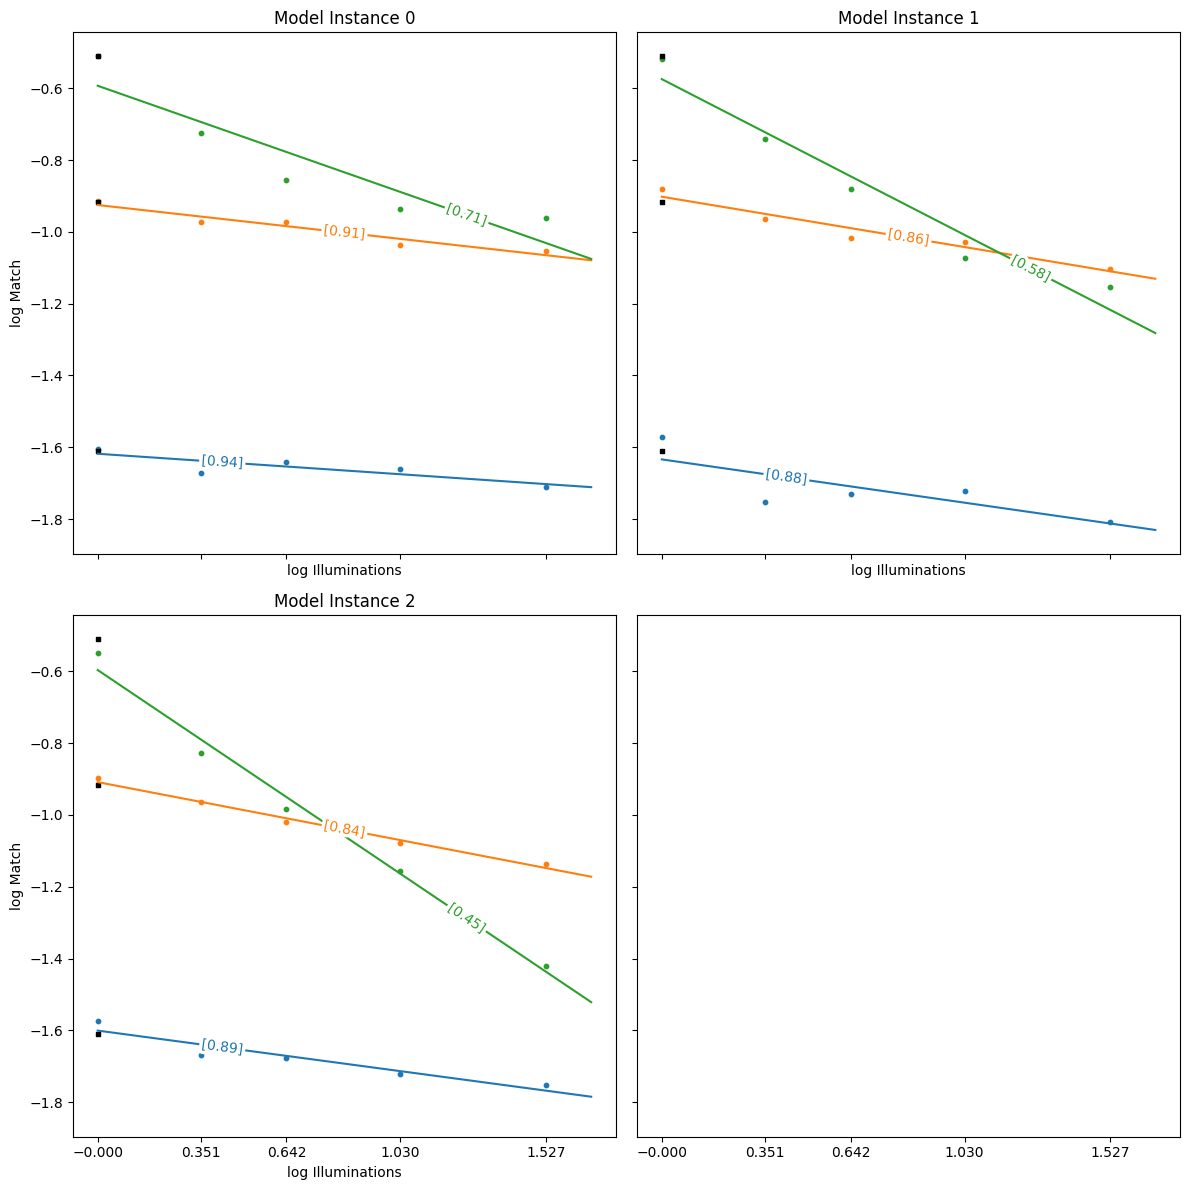

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


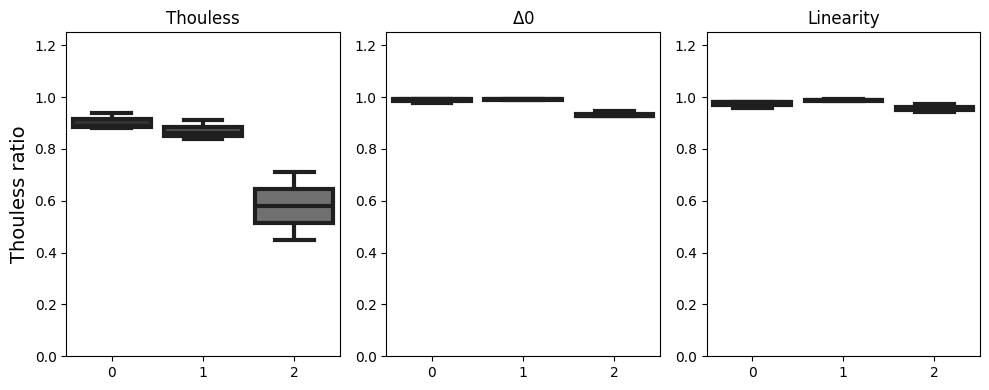

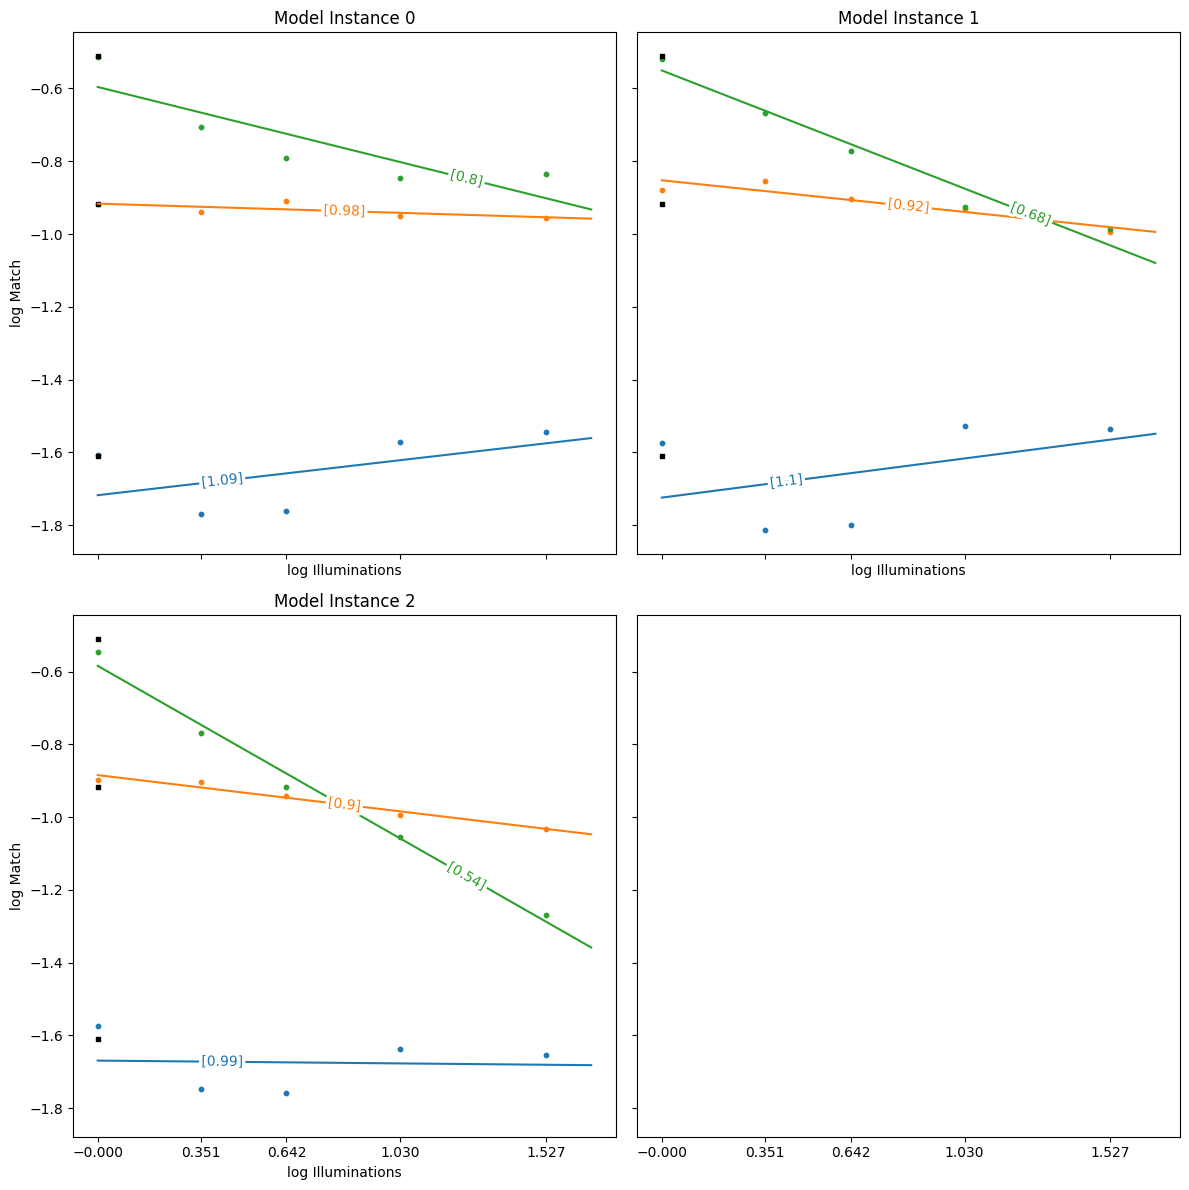

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


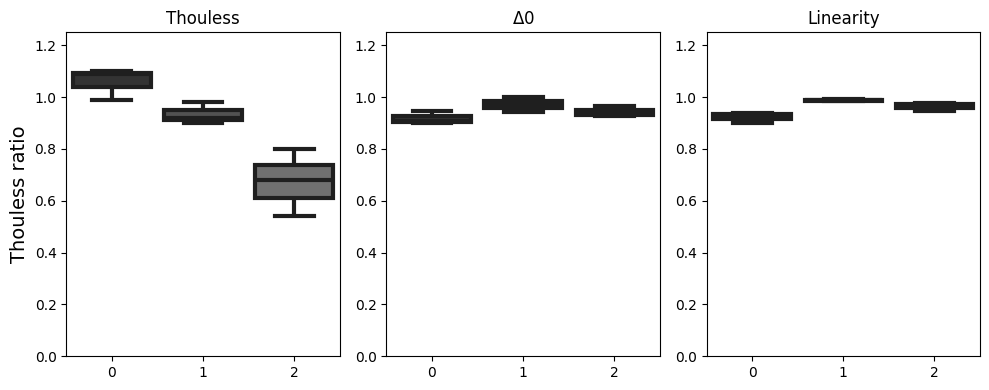

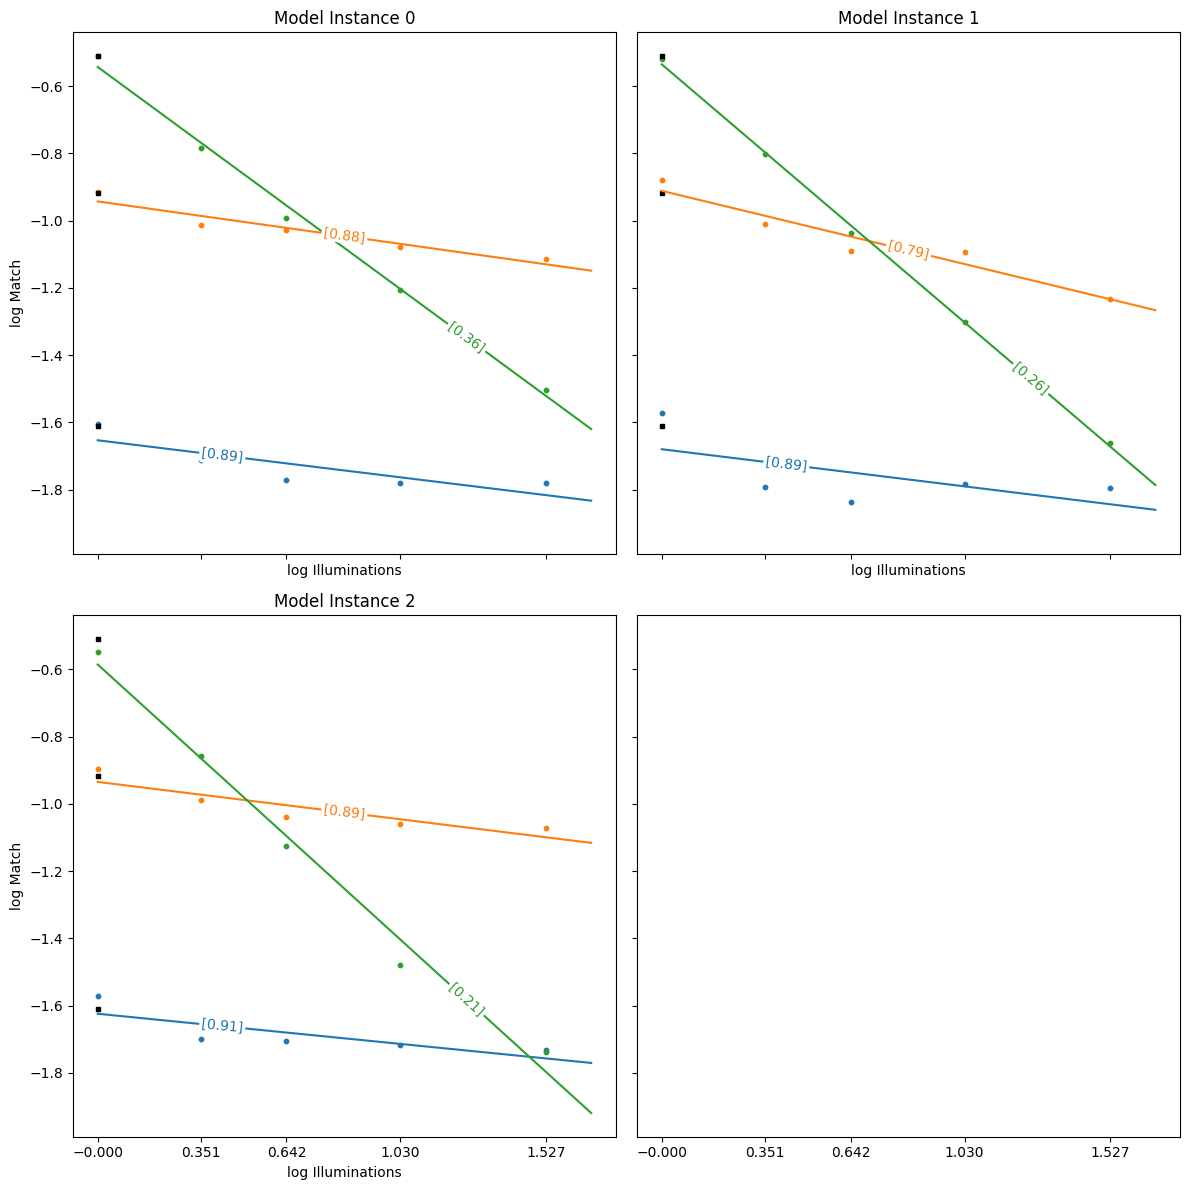

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


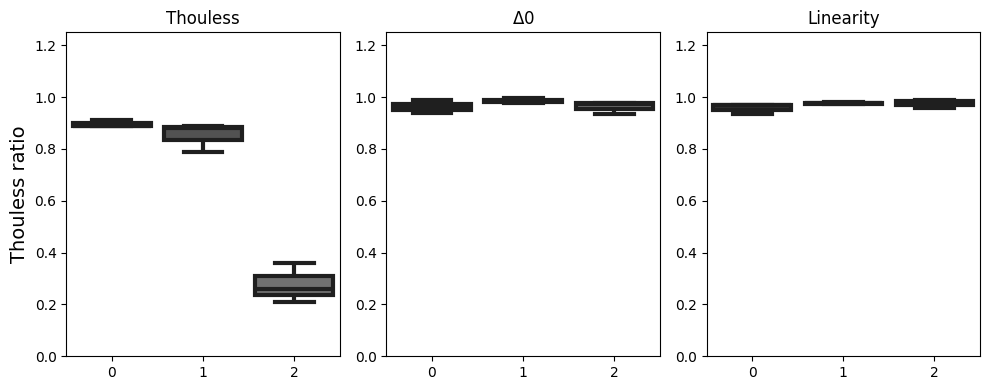

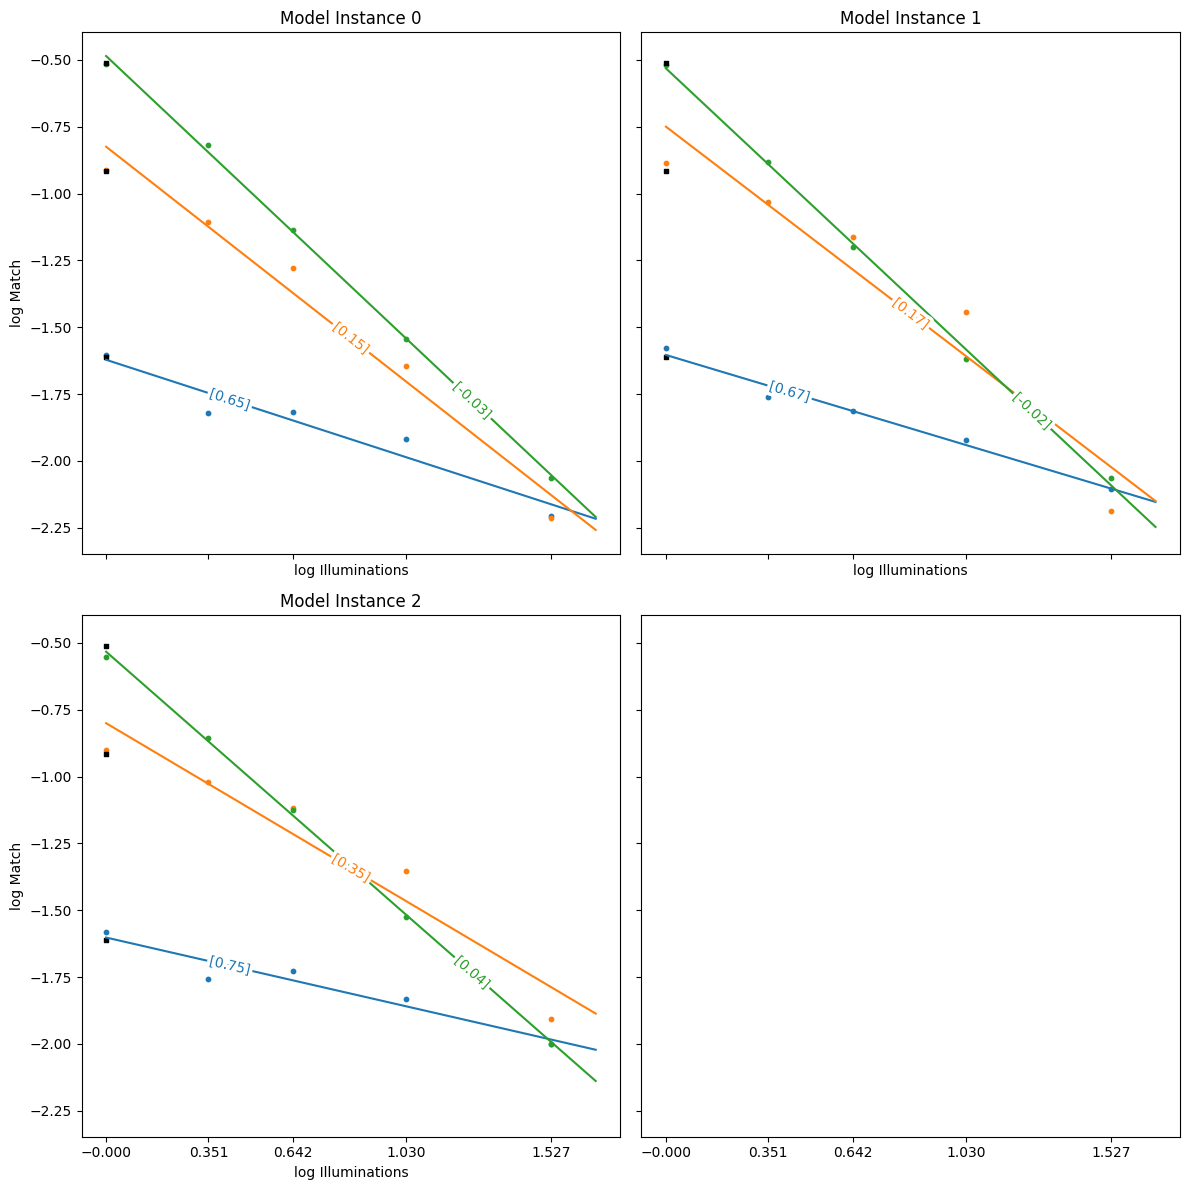

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


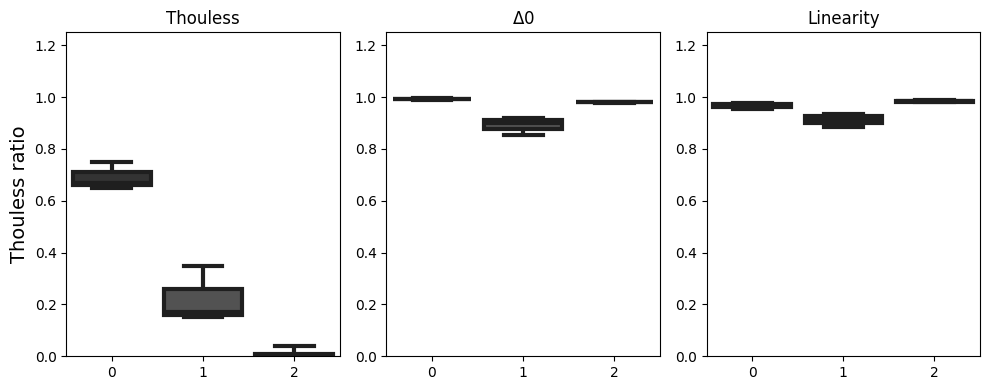

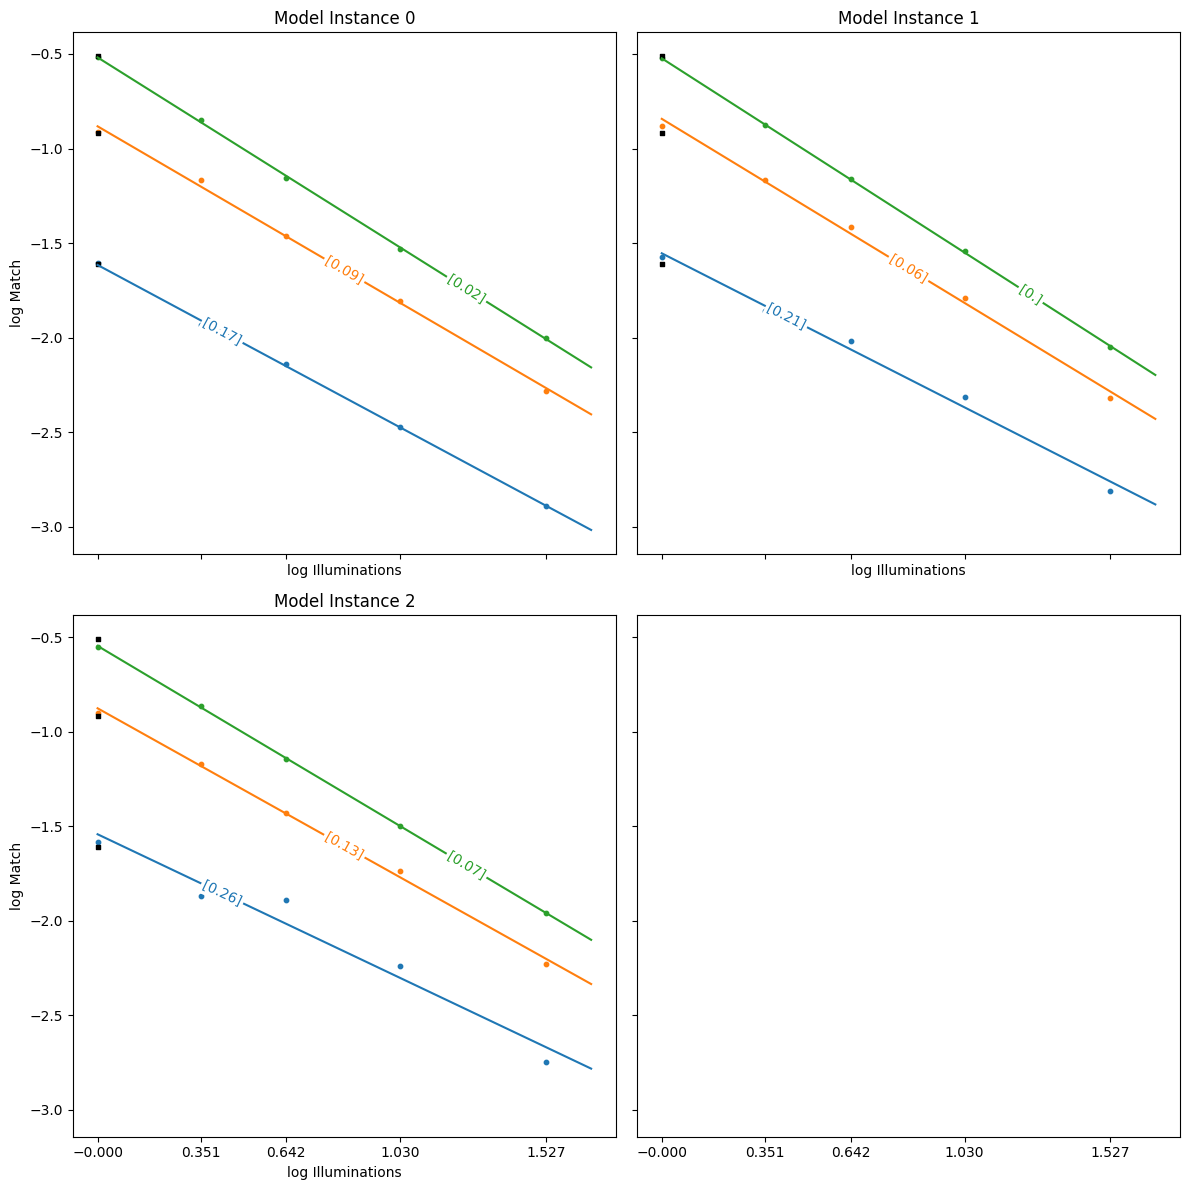

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


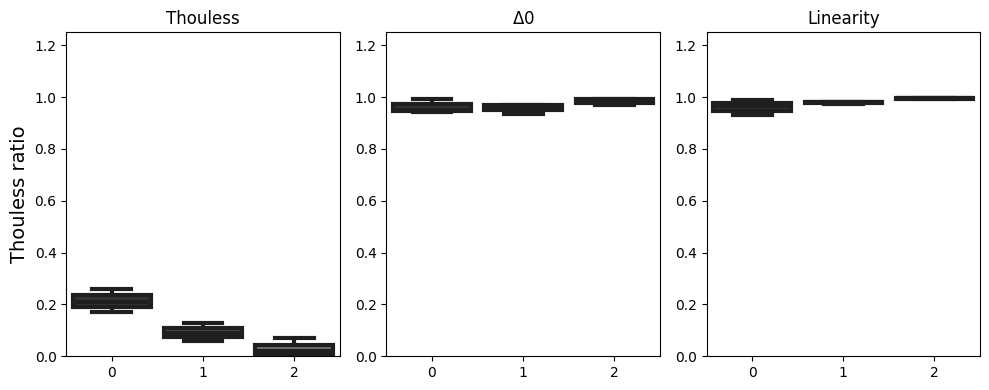

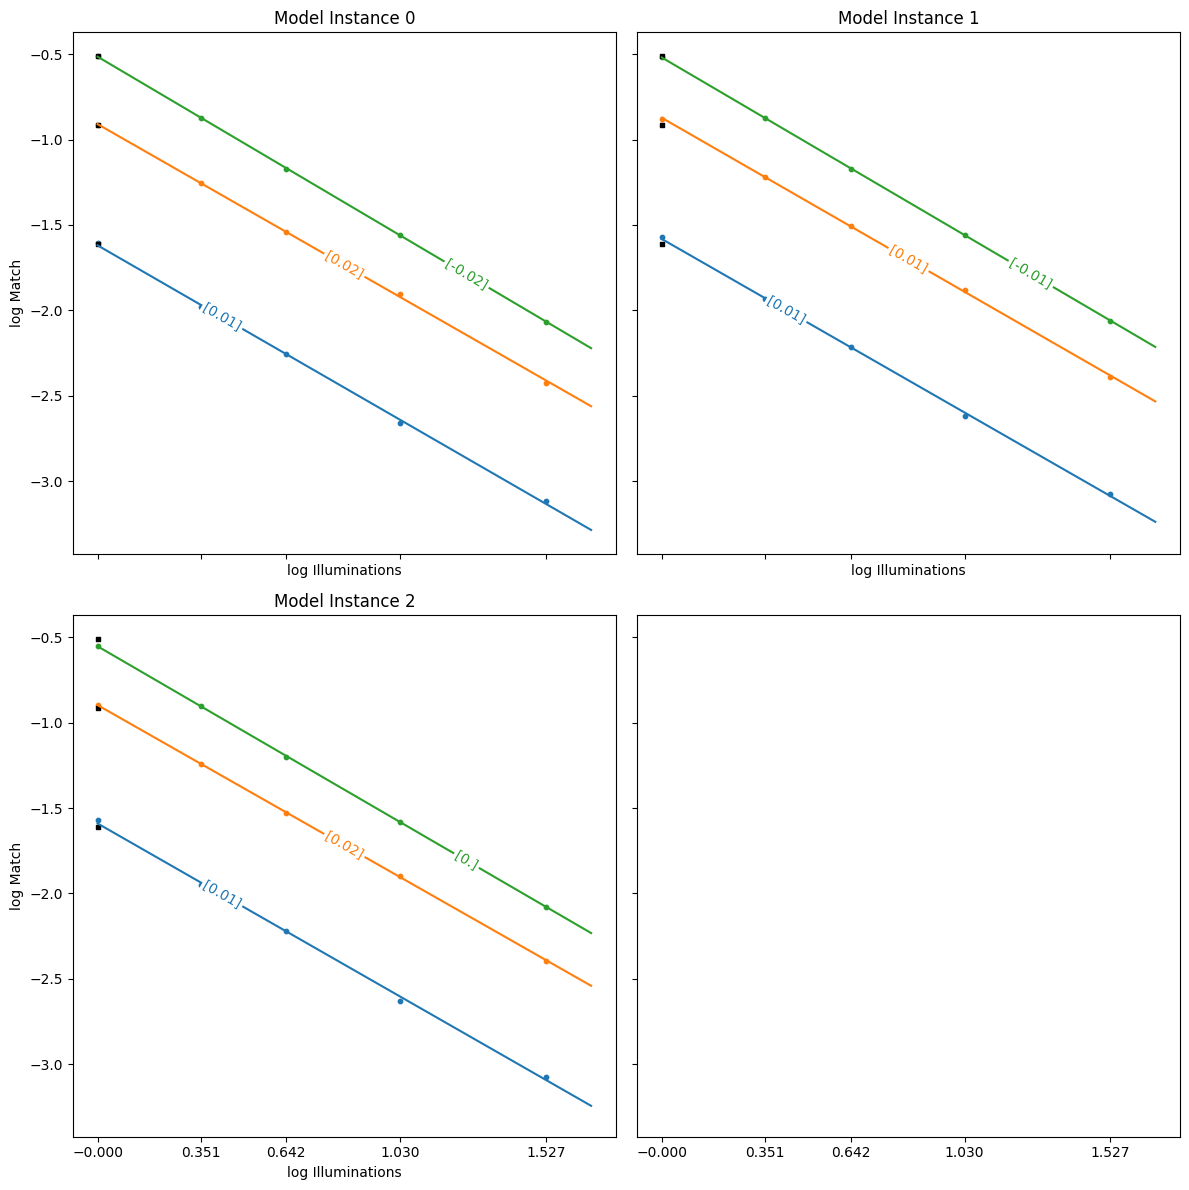

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


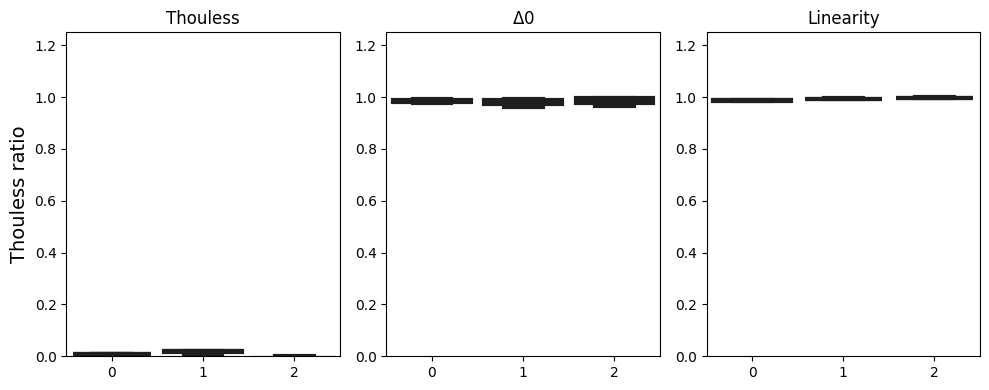

In [5]:
experiment = 'AlbanNetsupeeveepatterns_TwoCubesBlendereevee2p9'
illumref, illumtest, MATCHES, STATS = analysis(list_labels_ref, conditions, experiment = experiment)

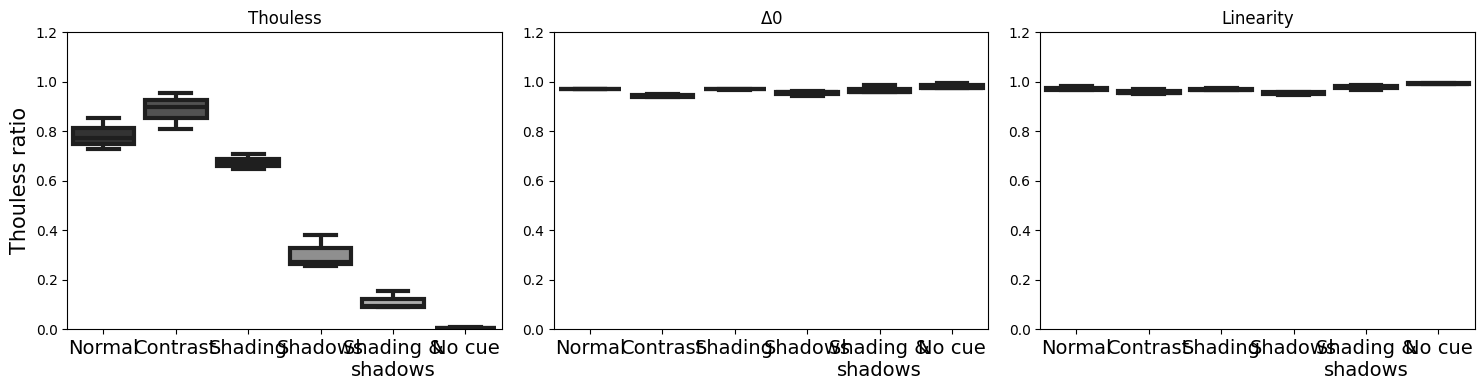

Mean thouless ratios are: [0.78444444 0.88888889 0.67555556 0.30333333 0.11222222 0.00555556]


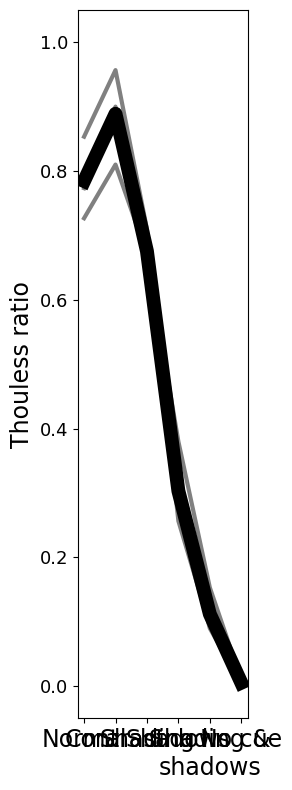

figures/AlbanNetsupeeveepatterns/Curves_conditions_TwoCubesBlendereevee2p9_AlbanNetsupeeveepatterns_allconditions.png


In [6]:
experiment = 'TwoCubesBlendereevee2p9_AlbanNetsupeeveepatterns'
xpname = experiment + '_allconditions'
rref = np.zeros(illumref['normal'].shape)
for c, i in enumerate(list_labels_ref):
    rref[:,c] = i
fig, subs, mean_thouless_eevee = plot_conditions(illumref, illumtest, MATCHES, list_labels_ref, rref, colors_ref, conditions, xpname = xpname)

In [7]:
nb_instances = 3
Thouless = np.zeros((len(conditions), nb_instances,3))
participants = Thouless.copy().astype(str)
CONDITIONS = Thouless.copy().astype(str)
ps = ['0', '1', '2']
for c, condition in enumerate(conditions):
    Thouless[c] = STATS[condition]['thouless']
    CONDITIONS[c] = condition
    for p, pp in enumerate(ps):
        participants[c, p] = pp
        

Thouless = Thouless.reshape(-1, 3)
print(Thouless.mean(0))
REFs = np.zeros(Thouless.shape)

REFs[:,0] = 0.2
REFs[:,1] = 0.4
REFs[:,2] = 0.6
DATAT = {}
DATAT['Thouless'] = Thouless.flatten()
DATAT['Refs'] = REFs.flatten()
DATAT['ID'] = participants.flatten()
DATAT['conditions'] = CONDITIONS.flatten()

[0.62888889 0.49833333 0.25777778]


In [8]:
## Repeated anovas for references and conditions

import pandas as pd
import pingouin as pg

dfT_eevee = pd.DataFrame.from_dict(DATAT)

aov = pg.rm_anova(data=dfT_eevee, dv='Thouless', within='Refs', subject='ID', detailed=True)
print(aov)

aov2 = pg.rm_anova(data=dfT_eevee, dv='Thouless', within='conditions', subject='ID', detailed=True)
print(aov2)

  Source        SS  DF        MS           F     p-unc       ng2       eps
0   Refs  0.212635   2  0.106318  104.242397  0.000354  0.974422  0.651139
1  Error  0.004080   4  0.001020         NaN       NaN       NaN       NaN
       Source        SS  DF        MS           F         p-unc       ng2  \
0  conditions  2.063013   5  0.412603  138.819564  6.658784e-09  0.984385   
1       Error  0.029722  10  0.002972         NaN           NaN       NaN   

        eps  
0  0.214348  
1       NaN  


In [9]:
Thouless = Thouless.reshape(len(conditions),nb_instances,3)
for c, cond in enumerate(conditions):
    ttest = pg.ttest(Thouless[0].flatten(), Thouless[c].flatten())
    print(cond + '\n')
    print(ttest)

normal

          T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test  0.0   16   two-sided    1.0  [-0.17, 0.17]      0.0  0.412   0.05
cube

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -1.245744   16   two-sided  0.230793  [-0.28, 0.07]  0.587249  0.695   

           power  
T-test  0.216176  
sphere

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.940538   16   two-sided  0.360926  [-0.14, 0.35]  0.443374  0.557   

           power  
T-test  0.143421  
floor

               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  4.060451   16   two-sided  0.000909  [0.23, 0.73]  1.914115  32.019   

           power  
T-test  0.967598  
floorsphere

                T  dof alternative         p-val         CI95%   cohen-d  \
T-test  10.603434   16   two-sided  1.208277e-08  [0.54, 0.81]  4.998507   

             BF10  power  
T-test  5.587e+05    1.0  
whole

     

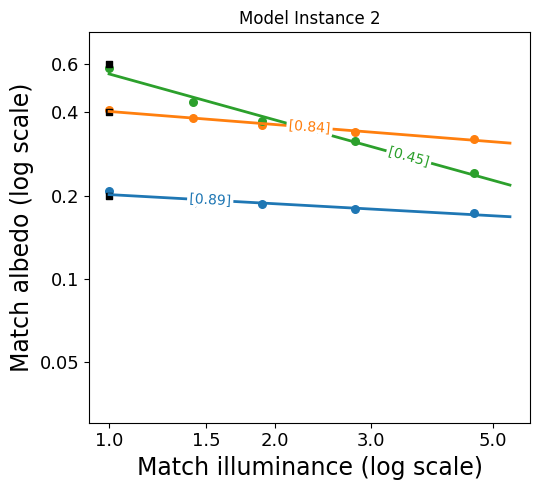

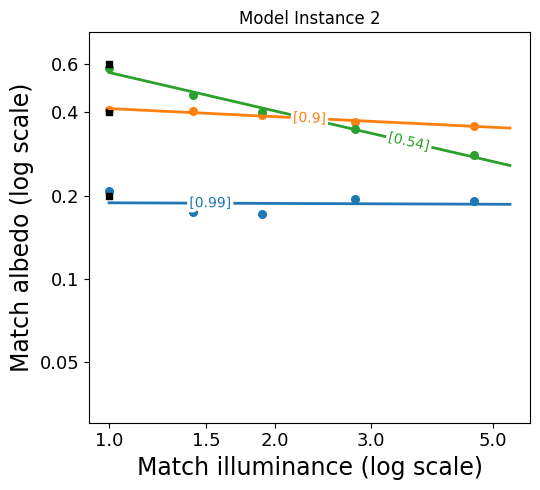

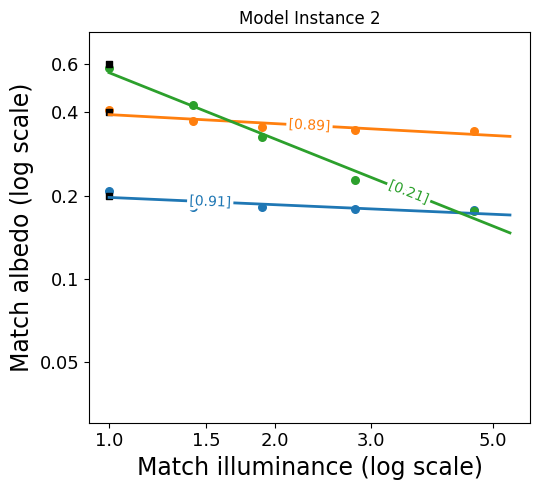

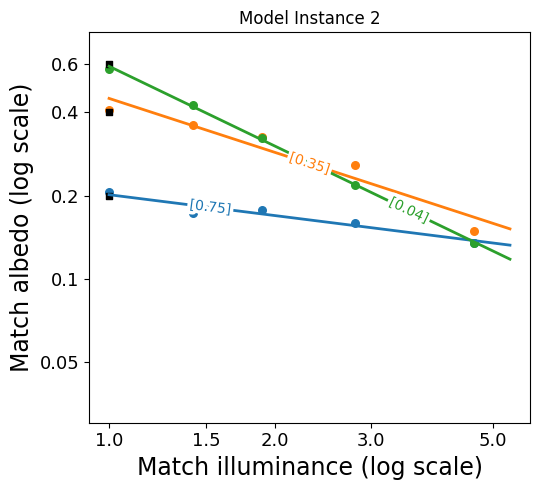

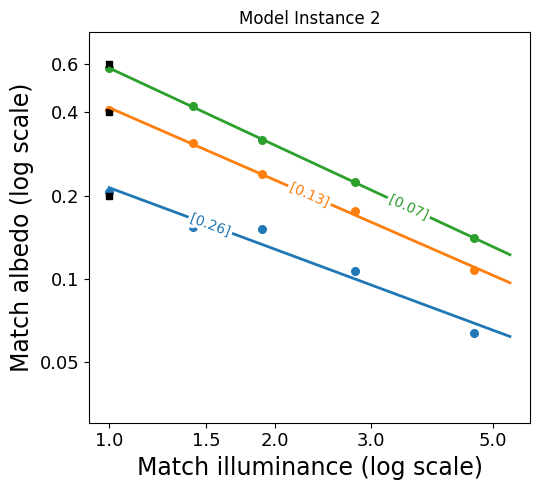

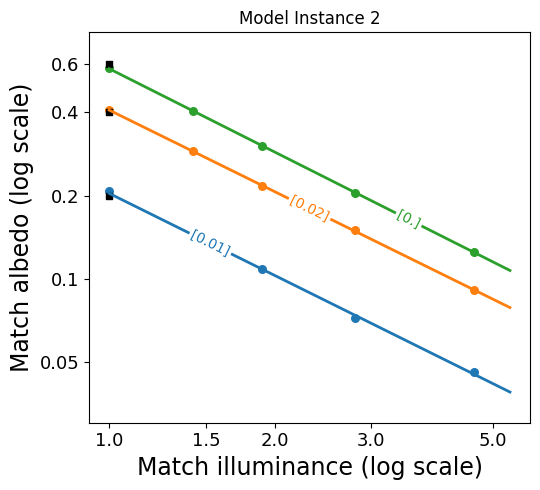

In [10]:
for condition in conditions:
    plot_linReg(illumref[condition], illumtest[condition], MATCHES[condition],list_labels_ref, rref, xpname=f'AlbanNetsupeeveepatterns_{condition}', p=2, lr=0)

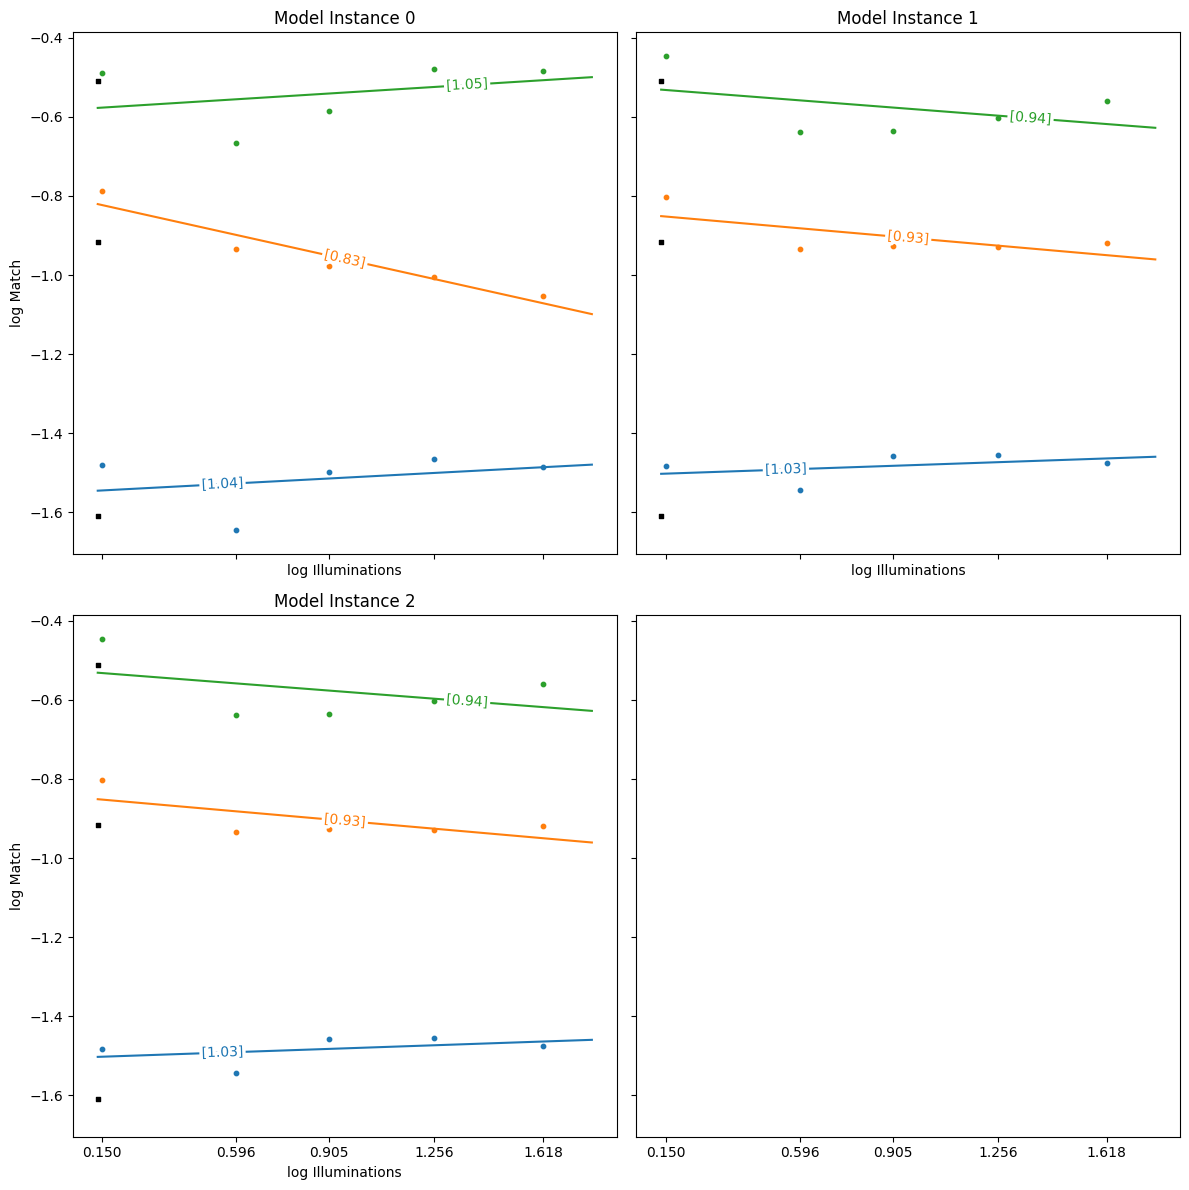

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


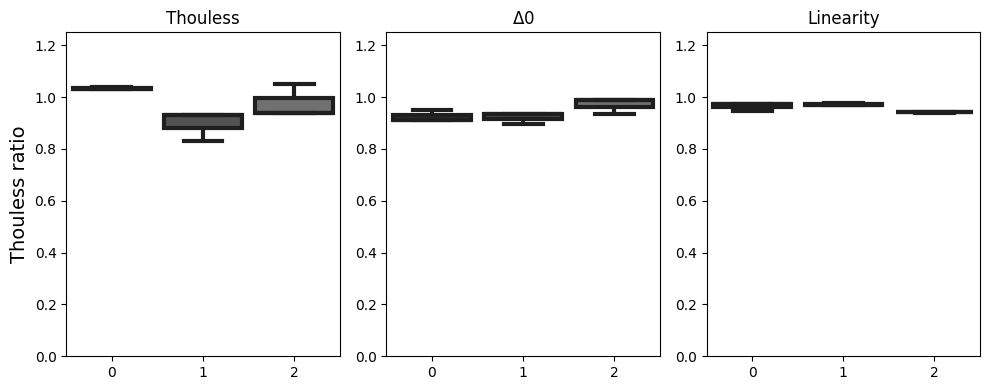

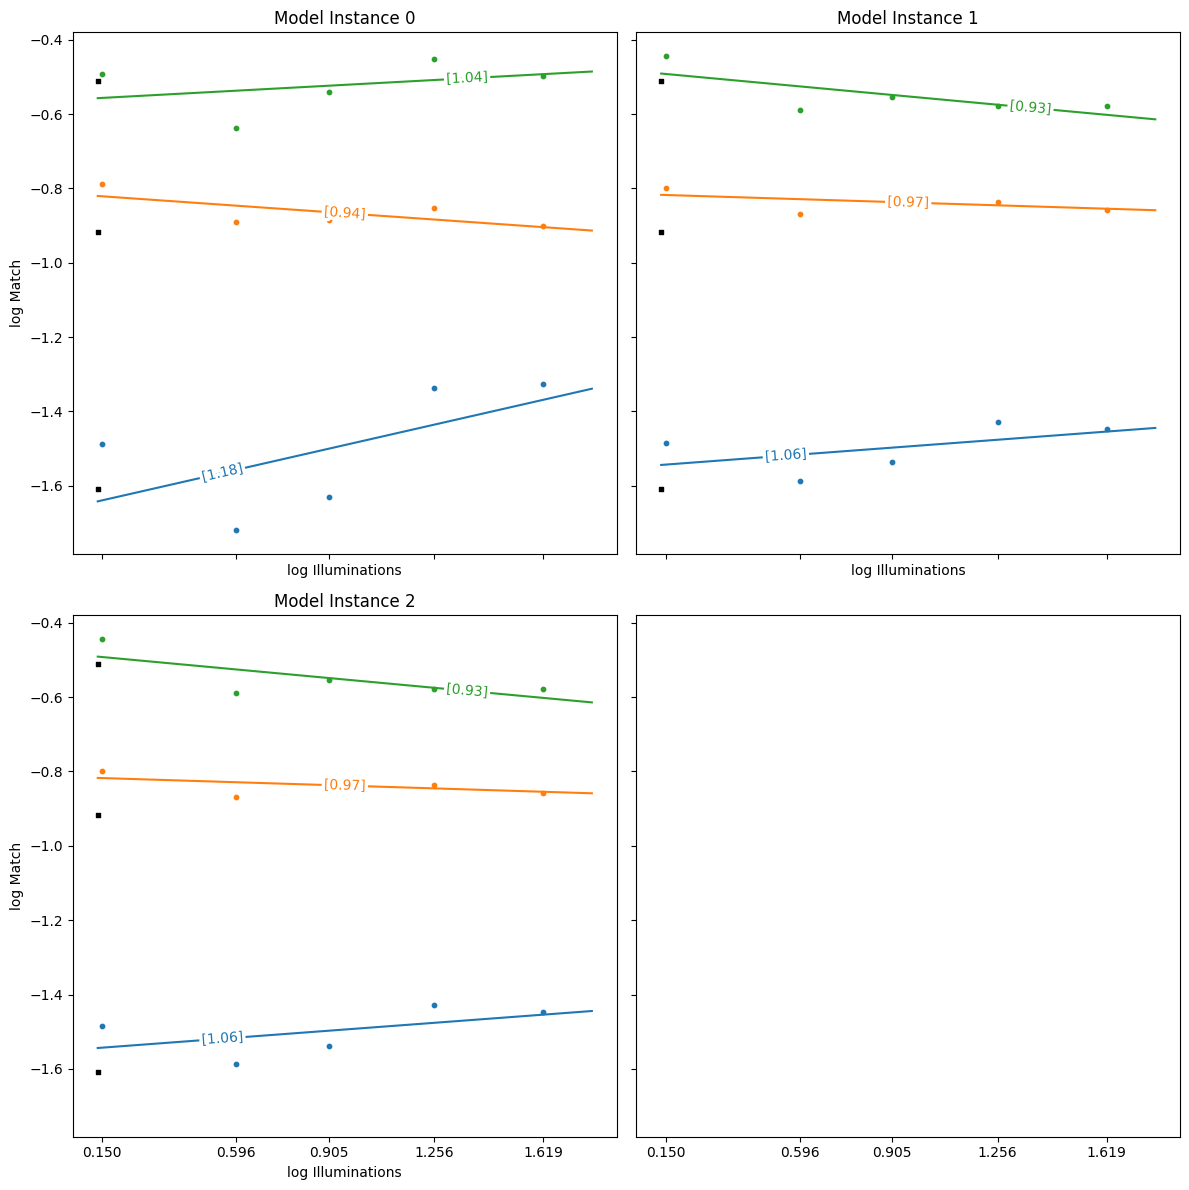

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


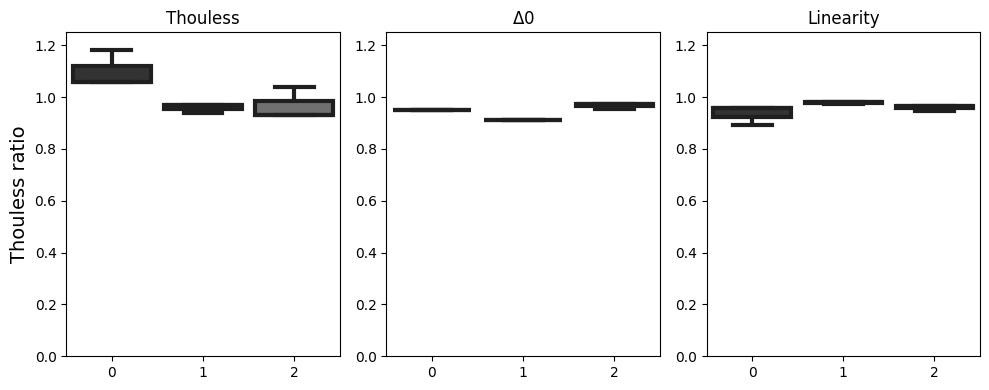

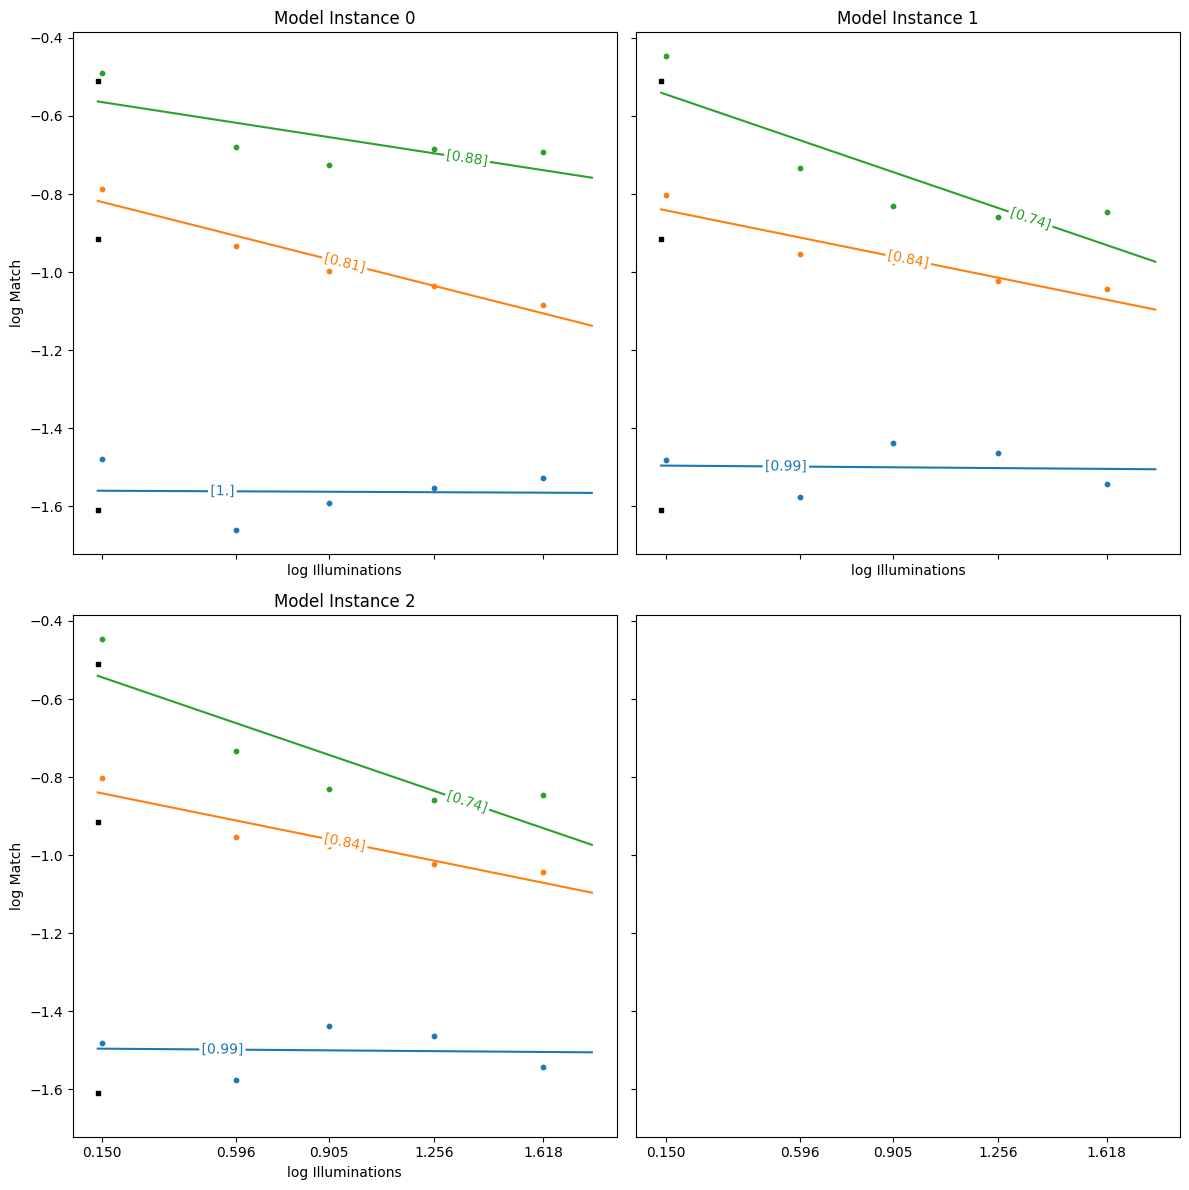

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


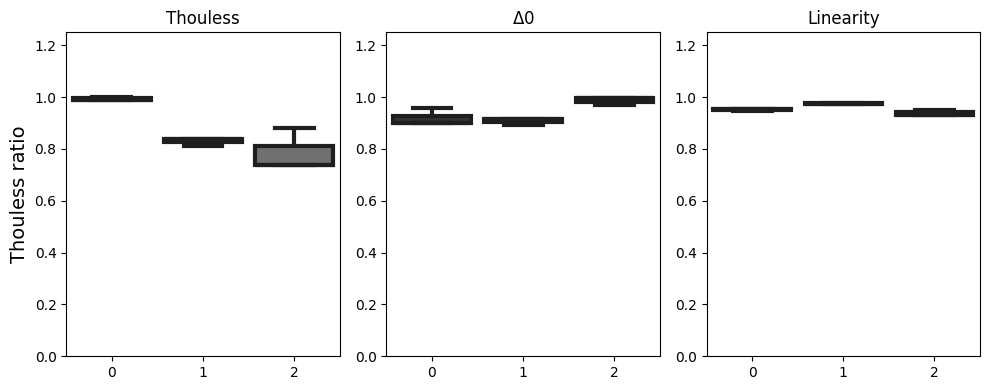

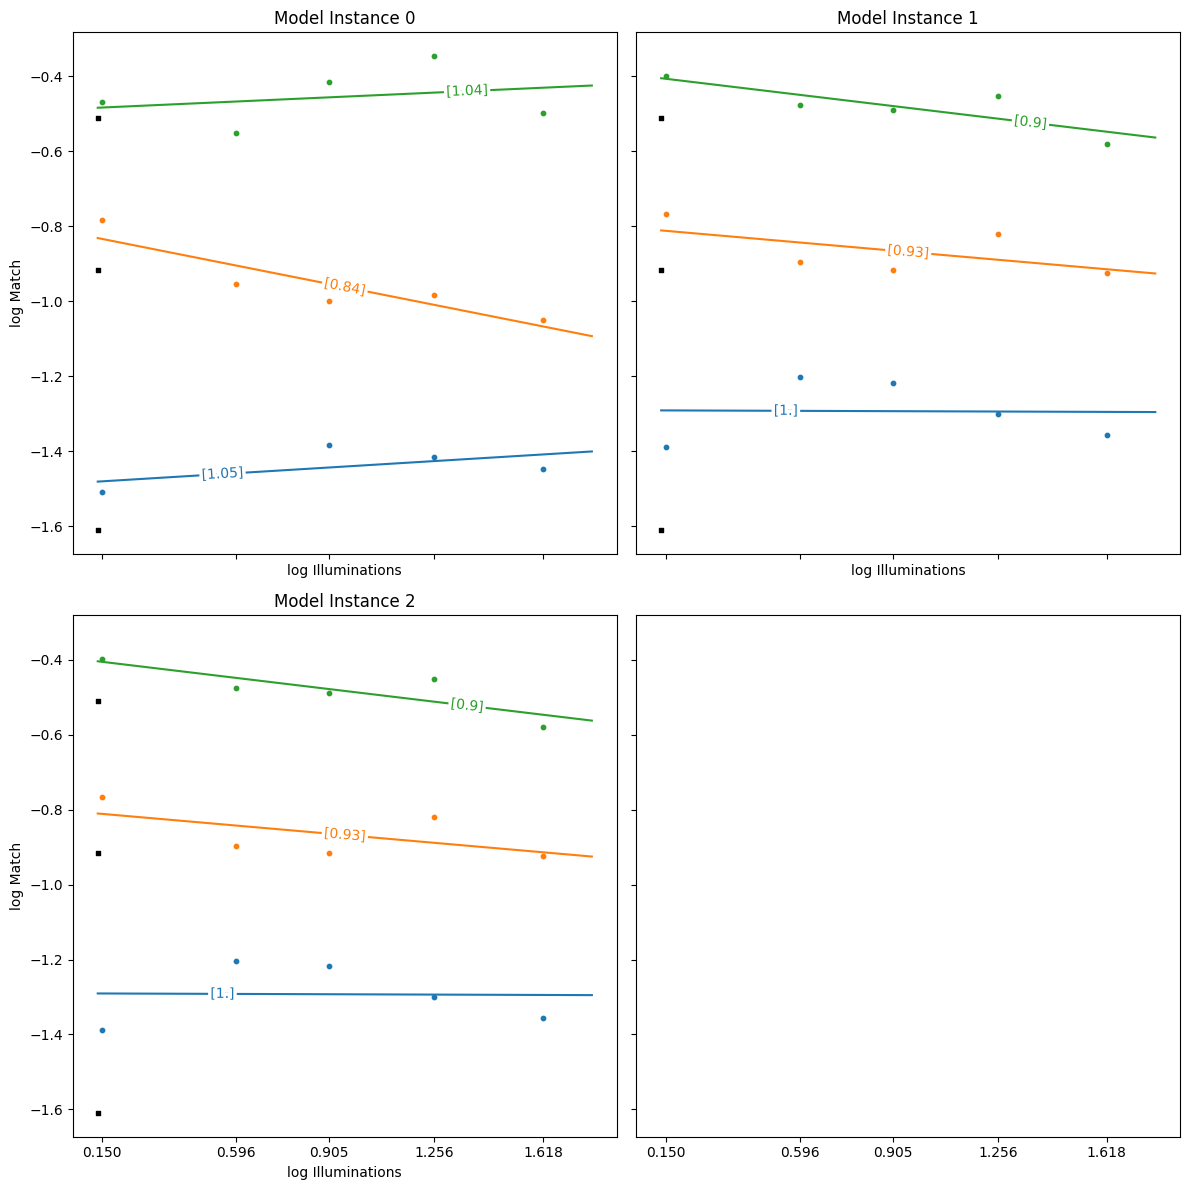

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


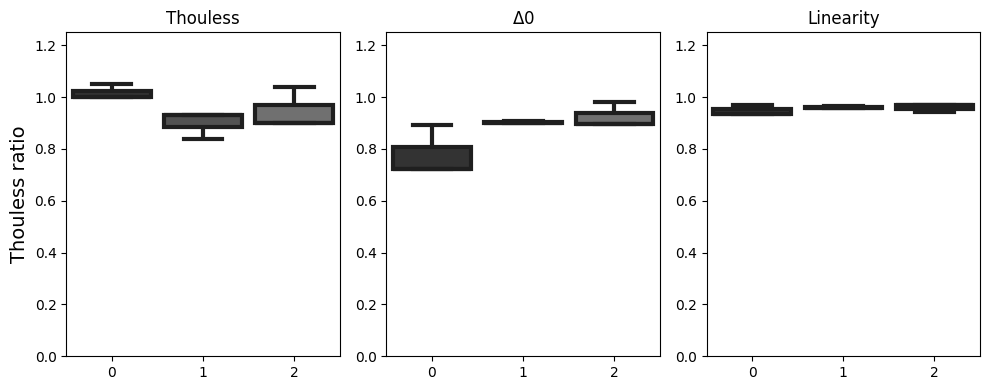

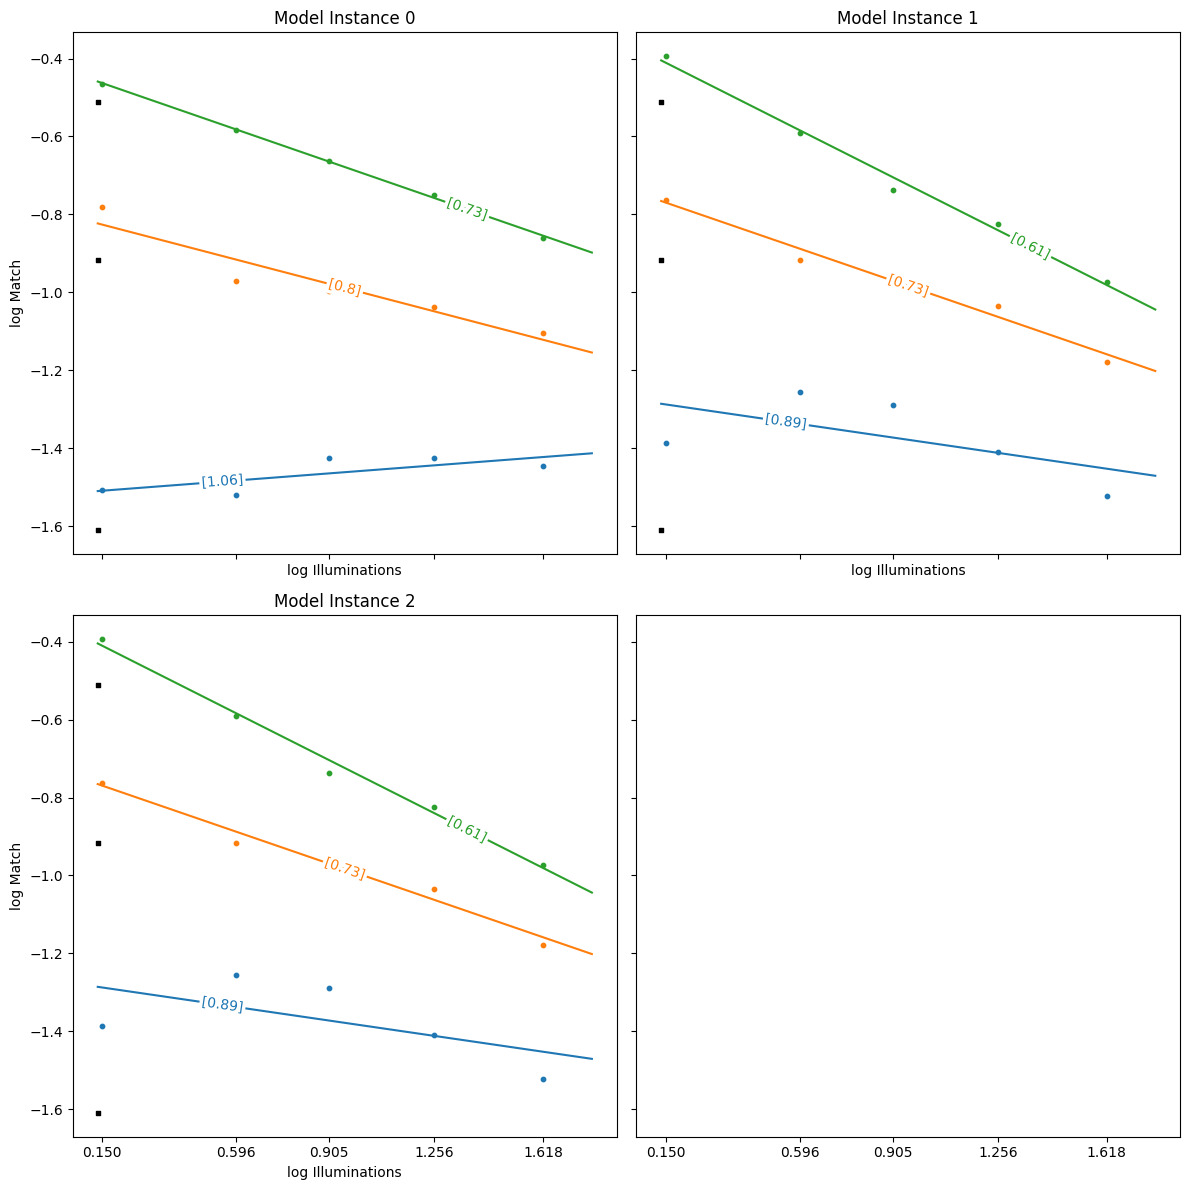

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


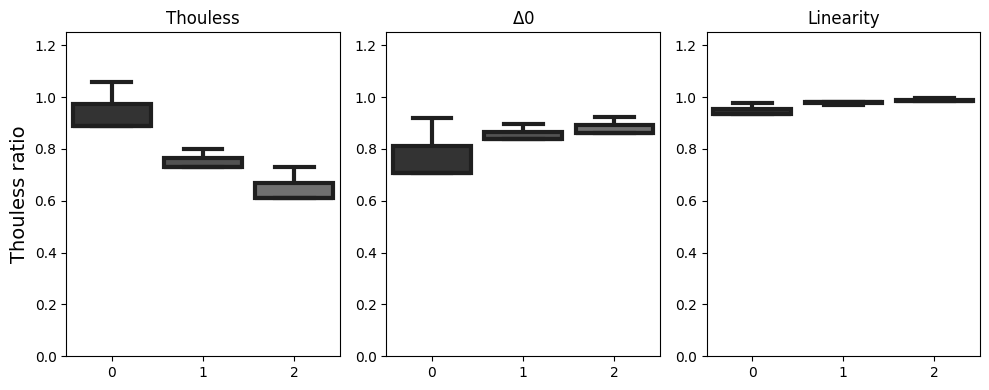

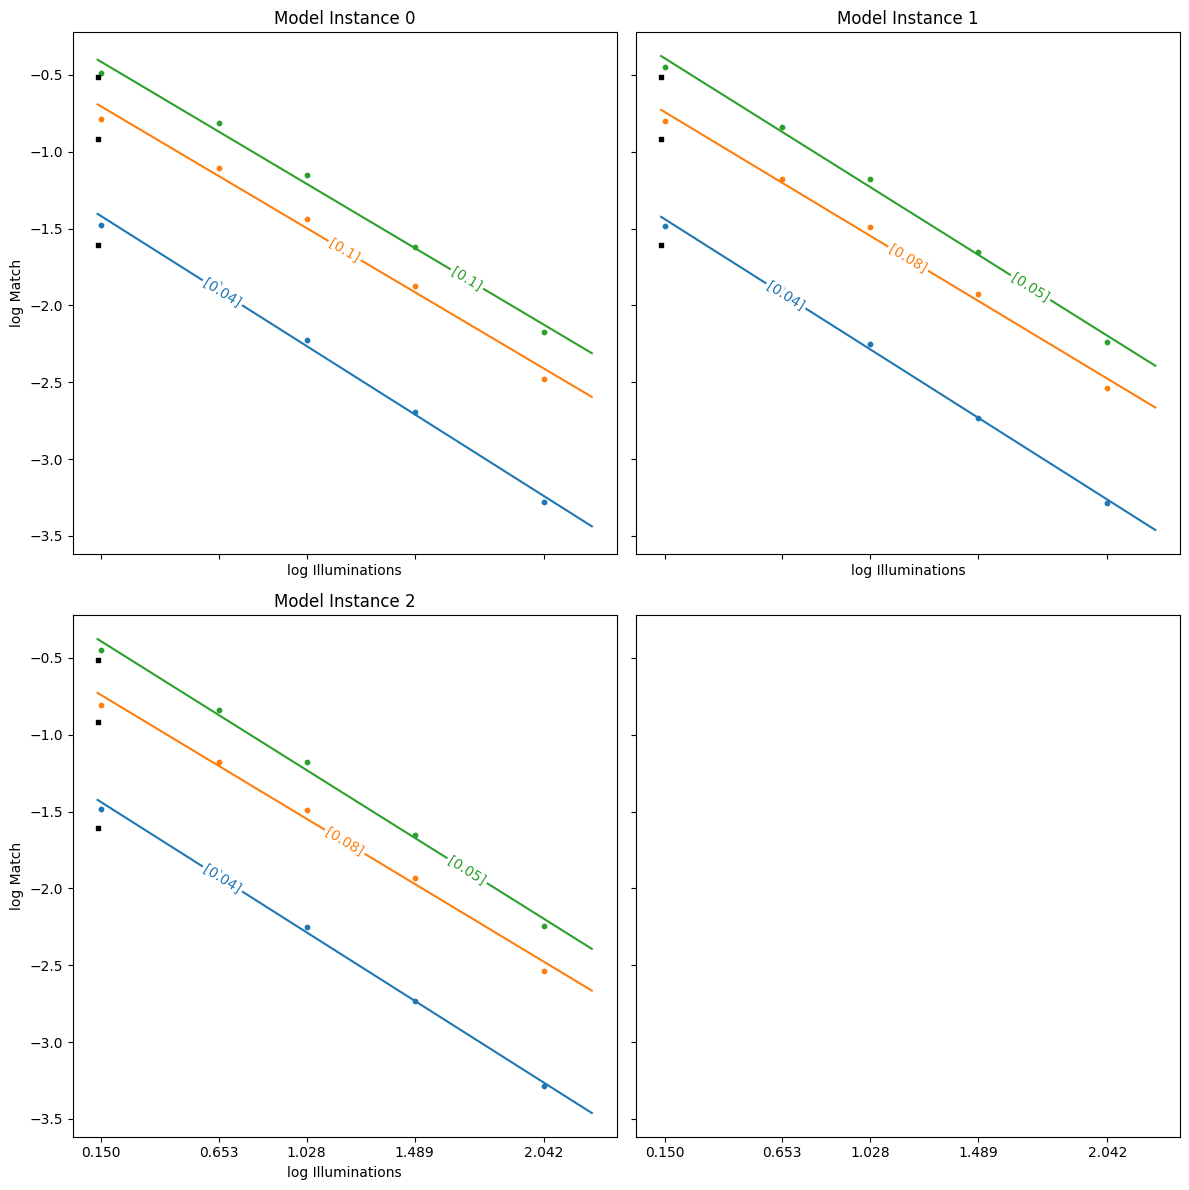

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


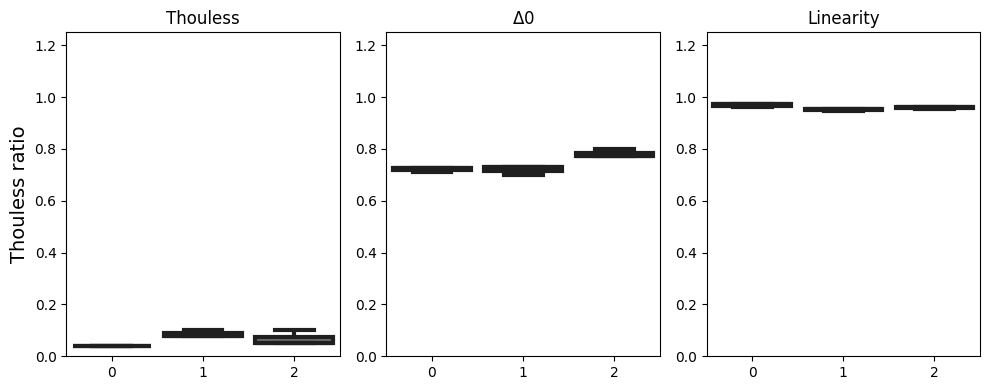

In [11]:
### same analysis with cycles 128

experiment = 'AlbanNetsup128patterns_TwoCubesBlender1282p9'
illumref, illumtest, MATCHES, STATS_cycles = analysis(list_labels_ref, conditions, experiment = experiment)


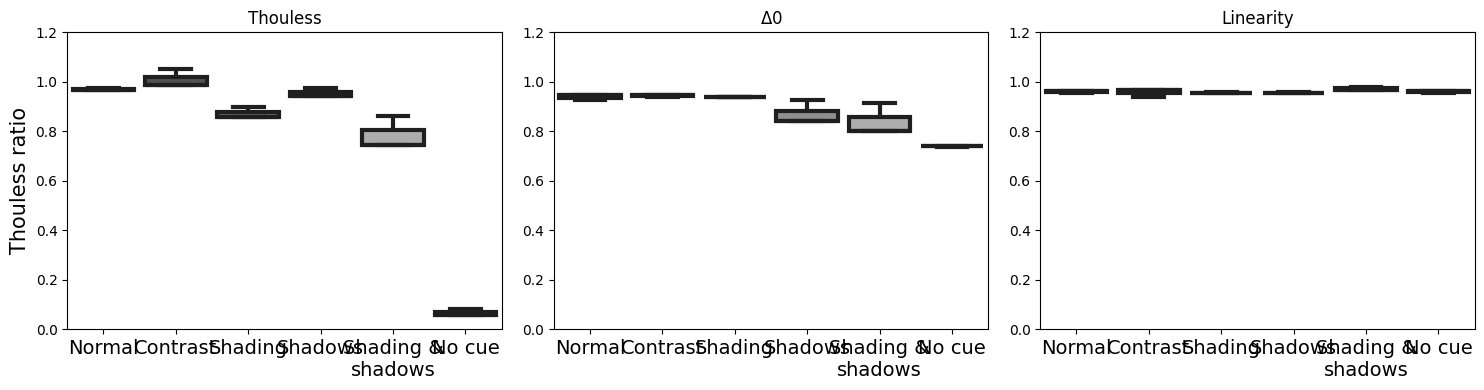

Mean thouless ratios are: [0.96888889 1.00888889 0.87       0.95444444 0.78333333 0.06444444]


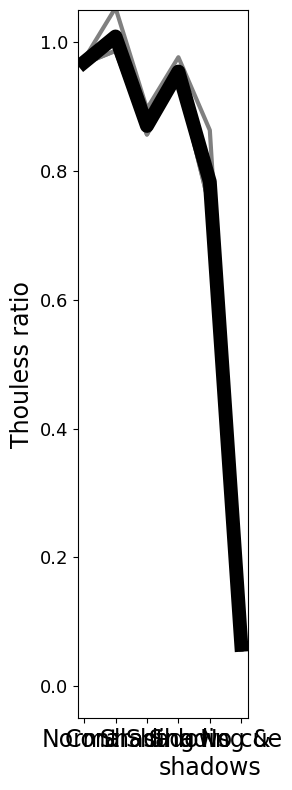

figures/AlbanNetsup128patterns/Curves_conditions_TwoCubesBlender1282p9_AlbanNetsup128patterns_allconditions.png


In [12]:
experiment = 'TwoCubesBlender1282p9_AlbanNetsup128patterns'
xpname = experiment + '_allconditions'
rref = np.zeros(illumref['normal'].shape)
for c, i in enumerate(list_labels_ref):
    rref[:,c] = i
fig, subs, mean_thouless_cycles = plot_conditions(illumref, illumtest, MATCHES, list_labels_ref, rref, colors_ref, conditions, xpname = xpname)

In [14]:
#subs.plot(np.arange(1,len(conditions) + 1), mean_Thouless)

NameError: name 'mean_Thouless' is not defined

In [15]:
nb_instances = 3
Thouless = np.zeros((len(conditions), nb_instances,3))
participants = Thouless.copy().astype(str)
CONDITIONS = Thouless.copy().astype(str)
ps = ['0', '1', '2']
for c, condition in enumerate(conditions):
    Thouless[c] = STATS_cycles[condition]['thouless']
    CONDITIONS[c] = condition
    for p, pp in enumerate(ps):
        participants[c, p] = pp
        

Thouless = Thouless.reshape(-1, 3)
print(Thouless.mean(0))
REFs = np.zeros(Thouless.shape)

REFs[:,0] = 0.2
REFs[:,1] = 0.4
REFs[:,2] = 0.6
DATAT_cycles = {}
DATAT_cycles['Thouless'] = Thouless.flatten()
DATAT_cycles['Refs'] = REFs.flatten()
DATAT_cycles['ID'] = participants.flatten()
DATAT_cycles['conditions'] = CONDITIONS.flatten()

[0.855      0.73777778 0.73222222]


In [16]:

dfT_cycles = pd.DataFrame.from_dict(DATAT_cycles)

aov = pg.rm_anova(data=dfT_eevee, dv='Thouless', within='Refs', subject='ID', detailed=True)
print(aov)

aov2 = pg.rm_anova(data=dfT_eevee, dv='Thouless', within='conditions', subject='ID', detailed=True)
print(aov2)

  Source        SS  DF        MS           F     p-unc       ng2       eps
0   Refs  0.212635   2  0.106318  104.242397  0.000354  0.974422  0.651139
1  Error  0.004080   4  0.001020         NaN       NaN       NaN       NaN
       Source        SS  DF        MS           F         p-unc       ng2  \
0  conditions  2.063013   5  0.412603  138.819564  6.658784e-09  0.984385   
1       Error  0.029722  10  0.002972         NaN           NaN       NaN   

        eps  
0  0.214348  
1       NaN  


In [17]:
Thouless = Thouless.reshape(len(conditions),nb_instances,3)
for c, cond in enumerate(conditions):
    ttest = pg.ttest(Thouless[0].flatten(), Thouless[c].flatten())
    print(cond + '\n')
    print(ttest)

normal

          T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test  0.0   16   two-sided    1.0  [-0.07, 0.07]      0.0  0.412   0.05
cube

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -1.079933   16   two-sided  0.296183  [-0.12, 0.04]  0.509085  0.612   

           power  
T-test  0.174064  
sphere

               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test  2.344542   16   two-sided  0.032282  [0.01, 0.19]  1.105228  2.302   

           power  
T-test  0.595844  
floor

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.423114   16   two-sided  0.677844  [-0.06, 0.09]  0.199458  0.438   

           power  
T-test  0.068365  
floorsphere

               T  dof alternative    p-val        CI95%   cohen-d    BF10  \
T-test  3.425326   16   two-sided  0.00347  [0.07, 0.3]  1.614714  11.355   

           power  
T-test  0.895017  
whole

                T  do

In [18]:
dfT_eevee['dataset'] = 'eevee'
dfT_cycles['dataset'] = 'cycles'
dfT_both = pd.concat([dfT_eevee, dfT_cycles], ignore_index=True)
dfT_both

,Thouless,Refs,ID,conditions,dataset
0,0.94,0.2,0,normal,eevee
1,0.91,0.4,0,normal,eevee
2,0.71,0.6,0,normal,eevee
3,0.88,0.2,1,normal,eevee
4,0.86,0.4,1,normal,eevee
...,...,...,...,...,...
103,0.08,0.4,1,whole,cycles
104,0.05,0.6,1,whole,cycles
105,0.04,0.2,2,whole,cycles
106,0.08,0.4,2,whole,cycles


In [19]:
aov = pg.anova(data=dfT_both, dv='Thouless', between='dataset', detailed=True)
print(aov)

    Source       SS   DF        MS          F     p-unc       np2
0  dataset   2.6508    1  2.650800  19.483743  0.000024  0.155269
1   Within  14.4215  106  0.136052        NaN       NaN       NaN
